# Chapter 5 - Ex1: Social Network Ads
## Cho dữ liệu Social_Network_Ads.csv
## Sử dụng thuật toán KNN để dự đoán khách hàng mua (1) hay không mua sản phẩm (0) dựa trên các thông tin được cung cấp:
1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột trừ cột Purchased, và outputs data với 1 cột là Purchased
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Đánh giá mô hình => Nhận xét
7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 5)

## <span style='color:yellow'> 1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
## <span style='color:yellow'> 2. Tạo inputs data với các cột trừ cột Purchased, và outputs data với 1 cột là Purchased
## <span style='color:yellow'> 3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30

In [12]:
ads = pd.read_csv('Data/Social_Network_Ads.csv')
ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
...,...,...,...,...,...
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [14]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [16]:
len(ads['User ID'].unique())

400

In [18]:
ads.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [79]:
ads['Purchased'].value_counts()

#Imbalanced => Use SMOTE to over_sample

Purchased
0    257
1    143
Name: count, dtype: int64

In [20]:
x = ads.drop(['User ID', 'Purchased'], axis=1)
y = ads['Purchased']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## <span style='color:yellow'> 4. Thực hiện KNN với X_train, y_train
## <span style='color:yellow'> 5. Dự đoán y từ X_test => so sánh với y_test
## <span style='color:yellow'> 6. Đánh giá mô hình => Nhận xét
## <span style='color:yellow'> 7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

K = 2 ___ Accuracy Test = 0.708 ___ Accuracy gap Test-Train = 0.213
K = 3 ___ Accuracy Test = 0.717 ___ Accuracy gap Test-Train = 0.187
K = 4 ___ Accuracy Test = 0.717 ___ Accuracy gap Test-Train = 0.169
K = 5 ___ Accuracy Test = 0.708 ___ Accuracy gap Test-Train = 0.181
K = 6 ___ Accuracy Test = 0.683 ___ Accuracy gap Test-Train = 0.206
K = 7 ___ Accuracy Test = 0.708 ___ Accuracy gap Test-Train = 0.167
K = 8 ___ Accuracy Test = 0.708 ___ Accuracy gap Test-Train = 0.156
K = 9 ___ Accuracy Test = 0.717 ___ Accuracy gap Test-Train = 0.126
K = 10 ___ Accuracy Test = 0.733 ___ Accuracy gap Test-Train = 0.117
K = 11 ___ Accuracy Test = 0.733 ___ Accuracy gap Test-Train = 0.113
K = 12 ___ Accuracy Test = 0.733 ___ Accuracy gap Test-Train = 0.124
K = 13 ___ Accuracy Test = 0.733 ___ Accuracy gap Test-Train = 0.113
K = 14 ___ Accuracy Test = 0.717 ___ Accuracy gap Test-Train = 0.133
K = 15 ___ Accuracy Test = 0.750 ___ Accuracy gap Test-Train = 0.096
K = 16 ___ Accuracy Test = 0.742 ___ Accur

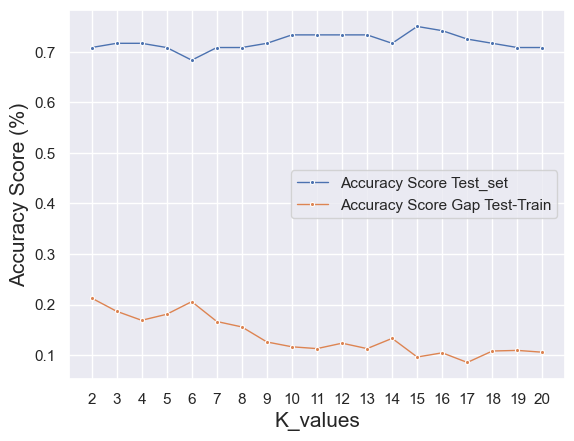

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

lst_k = []
lst_acc_test = []
lst_acc_diff = []

for k in range(2,21):
    lst_k.append(k)
    
    knnC_pipe = Pipeline([
        ("Onehot_Encoder", make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), ['Gender']), remainder='passthrough' )),
        ("SMOTE_OverSampling", SMOTE(random_state = 1)),
        ("KNN_Classifier",KNeighborsClassifier(n_neighbors=k))
         ])
    
    knnC_pipe.fit(x_train, y_train)

    y_test_pred =  knnC_pipe.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    lst_acc_test.append(acc_test)

    y_train_pred =  knnC_pipe.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    lst_acc_diff.append(np.absolute(acc_test - acc_train))

    print(f'K = {k} ___ Accuracy Test = {acc_test:.3f} ___ Accuracy gap Test-Train = {np.absolute(acc_test - acc_train):.3f}')

print()

sbn.set_theme(style='darkgrid')
sbn.lineplot(x = lst_k, y = lst_acc_test, label = 'Accuracy Score Test_set', marker='.', linewidth = 1)
sbn.lineplot(x = lst_k, y = lst_acc_diff, label = 'Accuracy Score Gap Test-Train', marker='.', linewidth = 1)
plt.xlabel('K_values', size=15)
plt.ylabel('Accuracy Score (%)', size=15)
plt.xticks(lst_k)
plt.show()

### Choose K = 15 to train model

Accuracy score on test set = 0.75


Confusion matrix:
              purchased_0  purchased_1
purchased_0           55           17
purchased_1           13           35


Classification report:
               precision    recall  f1-score   support

 purchased_0       0.81      0.76      0.79        72
 purchased_1       0.67      0.73      0.70        48

    accuracy                           0.75       120
   macro avg       0.74      0.75      0.74       120
weighted avg       0.75      0.75      0.75       120



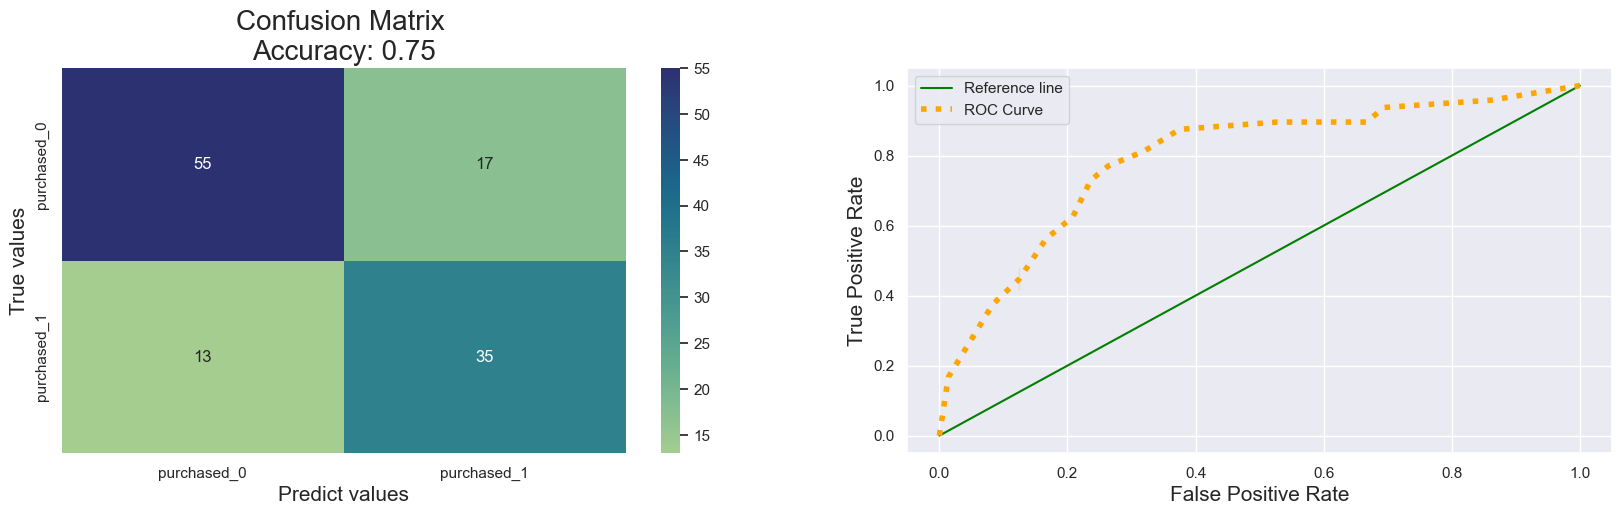


Comments:
# The model is goood
# Accuracy Score on train and test sets ~ 0.75
# F1-score for both classes are acceptable


In [101]:
knnC_pipe = Pipeline([
        ("Onehot_Encoder", make_column_transformer( (OneHotEncoder(handle_unknown='ignore'), ['Gender']), remainder='passthrough' )),
        ("SMOTE_OverSampling", SMOTE(random_state = 1)),
        ("KNN_Classifier",KNeighborsClassifier(n_neighbors=15))
         ])
    
knnC_pipe.fit(x_train, y_train)

y_test_pred =  knnC_pipe.predict(x_test)
y_test_proba = knnC_pipe.predict_proba(x_test)

print(f'Accuracy score on test set = {accuracy_score(y_test, y_test_pred)}')
print()
classes = ['purchased_0', 'purchased_1']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=classes, columns=classes)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=classes)}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True)
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()

print('''\nComments:
# The model is goood
# Accuracy Score on train and test sets ~ 0.75
# F1-score for both classes are acceptable''')